In [7]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6509 - loss: 0.6280 - val_accuracy: 0.7266 - val_loss: 0.5645
Epoch 2/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7161 - loss: 0.5878 - val_accuracy: 0.7324 - val_loss: 0.5524
Epoch 3/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7263 - loss: 0.5623 - val_accuracy: 0.7347 - val_loss: 0.5502
Epoch 4/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7301 - loss: 0.5530 - val_accuracy: 0.7372 - val_loss: 0.5465
Epoch 5/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7284 - loss: 0.5525 - val_accuracy: 0.7350 - val_loss: 0.5458
Epoch 6/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7244 - loss: 0.5542 - val_accuracy: 0.7354 - val_loss: 0.5448
Epoch 7/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7279 - loss: 0.5524 - val_accuracy: 0.7376 - val_loss: 0.5444
Epoch 8/20
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7297 - loss: 0.5

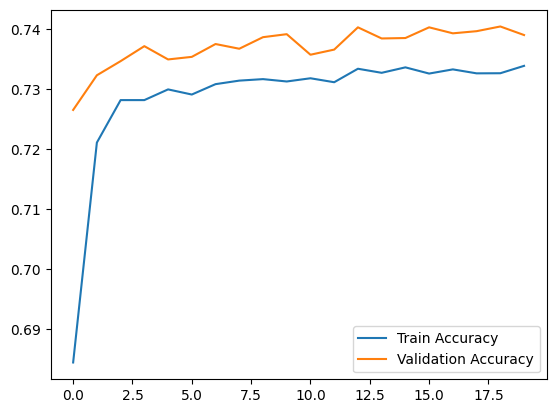

In [10]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (update the file path)
df = pd.read_csv("cardio_train.csv",delimiter=';')  # Replace with your actual dataset file

print(df.columns)

# Convert age from days to years
df['age'] = df['age'] / 365

# Separate features and target variable
X = df.drop(columns=['cardio'])  # Remove target variable
y = df['cardio']  # Target variable (0 or 1)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a simple neural network for classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

